<a href="https://colab.research.google.com/github/TraoAnTan/AI/blob/main/AI_W4_24_2_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 32.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=b9d4d3977830f6d8a1def73646968f1cd55c43e0d31bfea969ef814cd920f8ae
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


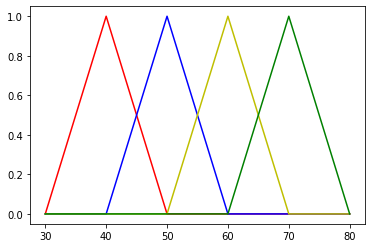

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x =np.arange(30,81,1)
slow = fuzz.trimf(x,[30,40,50])
medium =fuzz.trimf(x,[40,50,60])
medium_fast = fuzz.trimf(x,[50,60,70])
fast = fuzz.trimf(x,[60,70,80])
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label = 'Slow')
plt.plot(x,medium,'b',linewidth = 1.5, label = 'medium')
plt.plot(x,medium_fast, 'y', linewidth = 1.5, label = 'medium_fast')
plt.plot(x,fast, 'g', linewidth = 1.5, label = 'fast')


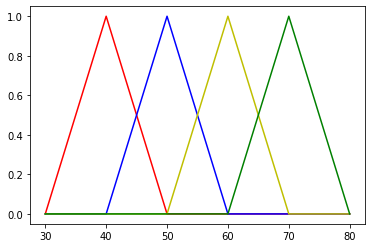

In [ ]:
x =np.arange(30,81,1)
slow = fuzz.trapmf(x,[30,40,40,50])
medium =fuzz.trapmf(x,[40,50,50,60])
medium_fast = fuzz.trapmf(x,[50,60,60,70])
fast = fuzz.trapmf(x,[60,70,70,80])
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label = 'Slow')
plt.plot(x,medium,'b',linewidth = 1.5, label = 'medium')
plt.plot(x,medium_fast, 'y', linewidth = 1.5, label = 'medium_fast')
plt.plot(x,fast, 'g', linewidth = 1.5, label = 'fast')

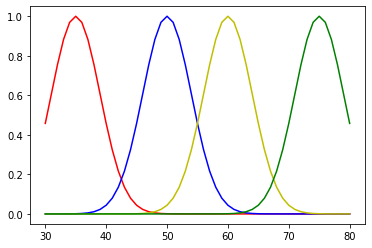

In [ ]:
x =np.arange(30,81,1)
slow = fuzz.gaussmf(x,35,4)
medium =fuzz.gaussmf(x,50,4)
medium_fast = fuzz.gaussmf(x,60,4)
fast = fuzz.gaussmf(x,75,4)
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label = 'Slow')
plt.plot(x,medium,'b',linewidth = 1.5, label = 'medium')
plt.plot(x,medium_fast, 'y', linewidth = 1.5, label = 'medium_fast')
plt.plot(x,fast, 'g', linewidth = 1.5, label = 'fast')

23.0


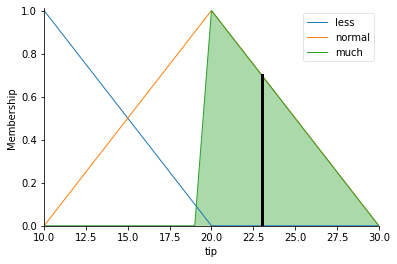

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,31,1),'tip')

food['poor'] = fuzz.trimf(food.universe, [0,0,5])
food['average'] = fuzz.trimf(food.universe,[0,5,10])
food['good'] = fuzz.trimf(food.universe,[5,10,10])
service['poor'] = fuzz.trimf(service.universe, [0,0,5])
service['average'] = fuzz.trimf(service.universe, [0,5,10])
service['good'] = fuzz.trimf(service.universe, [5,10,10])
tip['less'] = fuzz.trimf(tip.universe, [10,10,20])
tip['normal'] = fuzz.trimf(tip.universe, [10,20,30])
tip['much'] = fuzz.trimf(tip.universe, [20,20,30])

# food.view()
# service.view()
# tip.view()

rule1= ctrl.Rule(food['poor']& service['poor'],tip['less'])
rule2=ctrl.Rule(food['poor']& service['average'],tip['less'])
rule3=ctrl.Rule(food['poor']& service['good'],tip['normal'])
rule4=ctrl.Rule(food['average']& service['poor'],tip['less'])
rule5=ctrl.Rule(food['average']& service['average'],tip['normal'])
rule6=ctrl.Rule(food['average']& service['good'],tip['much'])
rule7=ctrl.Rule(food['good']& service['poor'],tip['less'])
rule8=ctrl.Rule(food['good']& service['average'],tip['normal'])
rule9=ctrl.Rule(food['good']& service['good'],tip['much'])


tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']= 10
tipping.input['service'] = 10
tipping.compute()
print(tipping.output['tip'])
tip.view(sim = tipping)




25.4040404040404


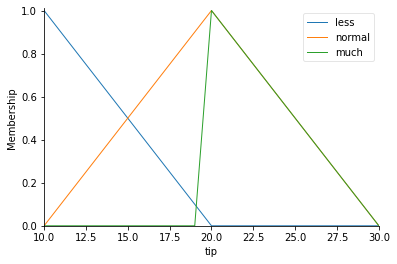

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

time = ctrl.Antecedent(np.arange(0,190,10),'time')
rice = ctrl.Antecedent(np.arange(0.2,1.6,0.1),'rice')
power = ctrl.Consequent(np.arange(0,110,10),'power')

time['very fast'] = fuzz.trimf(time.universe, [10,10,20])
time['fast'] = fuzz.trimf(time.universe,[20,25,30])
time['average'] = fuzz.trimf(time.universe,[29,35,40])
time['slow'] = fuzz.trimf(time.universe,[40,50,60])
time['very slow'] = fuzz.trimf(time.universe,[60,120,180])

# time.view()

rice['very little'] = fuzz.trimf(rice.universe, [0.2,0.2,0.4])
rice['little'] = fuzz.trimf(rice.universe,[0.2,0.3,0.4])
rice['average'] = fuzz.trimf(rice.universe,[0.4,0.6,0.8])
rice['much'] = fuzz.trimf(rice.universe,[0.6,0.8,1])
rice['very much'] = fuzz.trimf(rice.universe,[0.8,1.2,1.5])

# rice.view()

power['very fast'] = fuzz.trimf(power.universe, [0,0,30])
power['fast'] = fuzz.trimf(power.universe,[0,30,50])
power['average'] = fuzz.trimf(power.universe,[30,50,70])
power['slow'] = fuzz.trimf(power.universe,[50,70,90])
power['very slow'] = fuzz.trimf(power.universe,[70,90,100])

# power.view()
rule1= ctrl.Rule(time['very fast']& rice['very much'],power['very fast'])
rule2= ctrl.Rule(time['very fast']& rice['much'],power['very fast'])
rule3= ctrl.Rule(time['very fast']& rice['average'],power['fast'])
rule4= ctrl.Rule(time['very fast']& rice['little'],power['average'])
rule5= ctrl.Rule(time['very fast']& rice['very little'],power['slow'])
rule6= ctrl.Rule(time['fast']& rice['very much'],power['very fast'])
rule7= ctrl.Rule(time['fast']& rice['much'],power['fast'])
rule8= ctrl.Rule(time['fast']& rice['average'],power['fast'])
rule9= ctrl.Rule(time['fast']& rice['little'],power['average'])
rule10= ctrl.Rule(time['fast']& rice['very little'],power['slow'])
rule11= ctrl.Rule(time['average']& rice['very much'],power['fast'])
rule12= ctrl.Rule(time['average']& rice['much'],power['average'])
rule13= ctrl.Rule(time['average']& rice['average'],power['average'])
rule14= ctrl.Rule(time['average']& rice['little'],power['slow'])
rule15= ctrl.Rule(time['average']& rice['very little'],power['very slow'])
rule16= ctrl.Rule(time['slow']& rice['very much'],power['average'])
rule17= ctrl.Rule(time['slow']& rice['much'],power['slow'])
rule18= ctrl.Rule(time['slow']& rice['average'],power['slow'])
rule19= ctrl.Rule(time['slow']& rice['little'],power['very slow'])
rule20= ctrl.Rule(time['slow']& rice['very little'],power['very slow'])
rule21= ctrl.Rule(time['very slow']& rice['very much'],power['slow'])
rule22= ctrl.Rule(time['very slow']& rice['much'],power['slow'])
rule23= ctrl.Rule(time['very slow']& rice['average'],power['very slow'])
rule24= ctrl.Rule(time['very slow']& rice['little'],power['very slow'])
rule25= ctrl.Rule(time['very slow']& rice['very little'],power['very slow'])

tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,
                                  rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['time']= 30
tipping.input['rice'] = 1.2
tipping.compute()
print(tipping.output['power'])
tip.view(sim = tipping)

